In [34]:
import torch

In [35]:
import torchvision

In [36]:
from torchvision import transforms, datasets

In [37]:



train = datasets.MNIST("", train = True, download = True,
                       transform= transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train = False, download = True,
                       transform= transforms.Compose([transforms.ToTensor()]))


Data importation

In [38]:

trainset = torch.utils.data.DataLoader(train, batch_size=16,shuffle= True) # batch_siez is between 8 and 64


testset = torch.utils.data.DataLoader(test , batch_size=16,shuffle= True)


In [39]:
for data in trainset :
  print (data)
  break # 1 batch of 10 random samples of the dataset, and the tensor of ther values


[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [40]:
# in the for loop, the last temporary variable that is used can still be accesed

#here, data is a tesor of tensor images and a tensor of tensor for your values


x,y = data[0][0], data[1][0]

print (y)


tensor(0)


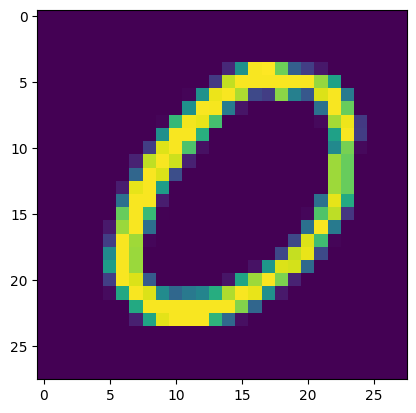

In [41]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28, 28))
#puisque torch.Size([1, 28, 28]) n'est pas une taille valide pour plt
plt.show()

In [42]:
print(x.shape)

torch.Size([1, 28, 28])


What is Balancing

In [43]:
conter_dict = {0 : 0, 1 : 0, 2 : 0, 3 : 0,4 : 0,5 : 0,6 : 0, 7 : 0, 8 : 0, 9 : 0}
total = 0
for data in trainset:
  Xs, Ys = data
  for y in Ys:
    conter_dict[int(y)] +=1
    total+=1

print (conter_dict)
for k in range (10):
  conter_dict[int(k)] = (conter_dict[int(k)]/total)*100

print(conter_dict)





{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
{0: 9.871666666666666, 1: 11.236666666666666, 2: 9.93, 3: 10.218333333333334, 4: 9.736666666666666, 5: 9.035, 6: 9.863333333333333, 7: 10.441666666666666, 8: 9.751666666666667, 9: 9.915000000000001}


In [44]:

import torch.nn as nn
import torch.nn.functional as F

Building the Neural Network

In [45]:

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        #fc = fully connected, 1 = first layer
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc1 = nn.Linear(28*28, 64) 
        self.fc2 = nn.Linear(64, 64) 
        self.fc3 = nn.Linear(64, 64) 
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):

        x = self.flatten(x)
        
        x = F.relu(self.fc1(x)) #relu = rectified linear --> activation fction
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)#we need a O to 1 output in this tensor so we use log_sofmax
        return F.log_softmax(x, dim = 1) # dim = 0 is the batches i think
    

net = Net()
print(net)


Net(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [46]:
x = torch.rand((28,28))
print (x)

tensor([[7.0517e-02, 9.2440e-01, 6.6551e-01, 1.3533e-01, 9.5665e-01, 3.8836e-01,
         1.3881e-01, 8.8262e-01, 3.0298e-01, 4.5895e-01, 3.2266e-01, 5.4260e-02,
         1.1087e-01, 4.0233e-01, 4.8079e-01, 9.6573e-02, 8.7300e-01, 7.7284e-01,
         9.9251e-01, 9.5581e-01, 6.4834e-01, 7.8703e-01, 3.6018e-01, 2.1797e-01,
         3.0999e-02, 6.4150e-01, 9.7308e-01, 7.1518e-01],
        [1.6574e-01, 3.8210e-01, 1.1683e-01, 4.6744e-01, 8.8508e-01, 6.3090e-01,
         1.3796e-01, 8.5603e-01, 5.9820e-01, 4.3377e-01, 6.5585e-01, 6.8809e-01,
         9.6480e-01, 8.6875e-01, 4.5920e-01, 1.9207e-01, 7.2000e-01, 3.2572e-01,
         8.1097e-01, 4.3137e-01, 8.4980e-01, 8.5564e-01, 6.4562e-01, 5.9223e-01,
         4.8581e-01, 4.5620e-01, 9.8457e-01, 4.3082e-01],
        [3.7003e-01, 6.1354e-01, 9.1135e-01, 6.1050e-01, 6.1965e-01, 2.1372e-01,
         6.4841e-02, 4.1302e-01, 2.2089e-01, 4.3611e-01, 5.5208e-01, 9.2542e-01,
         2.9879e-02, 7.0746e-01, 6.7256e-02, 2.4518e-01, 1.3297e-01, 3.184

In [47]:
x = x.view(1,28*28)
x

tensor([[7.0517e-02, 9.2440e-01, 6.6551e-01, 1.3533e-01, 9.5665e-01, 3.8836e-01,
         1.3881e-01, 8.8262e-01, 3.0298e-01, 4.5895e-01, 3.2266e-01, 5.4260e-02,
         1.1087e-01, 4.0233e-01, 4.8079e-01, 9.6573e-02, 8.7300e-01, 7.7284e-01,
         9.9251e-01, 9.5581e-01, 6.4834e-01, 7.8703e-01, 3.6018e-01, 2.1797e-01,
         3.0999e-02, 6.4150e-01, 9.7308e-01, 7.1518e-01, 1.6574e-01, 3.8210e-01,
         1.1683e-01, 4.6744e-01, 8.8508e-01, 6.3090e-01, 1.3796e-01, 8.5603e-01,
         5.9820e-01, 4.3377e-01, 6.5585e-01, 6.8809e-01, 9.6480e-01, 8.6875e-01,
         4.5920e-01, 1.9207e-01, 7.2000e-01, 3.2572e-01, 8.1097e-01, 4.3137e-01,
         8.4980e-01, 8.5564e-01, 6.4562e-01, 5.9223e-01, 4.8581e-01, 4.5620e-01,
         9.8457e-01, 4.3082e-01, 3.7003e-01, 6.1354e-01, 9.1135e-01, 6.1050e-01,
         6.1965e-01, 2.1372e-01, 6.4841e-02, 4.1302e-01, 2.2089e-01, 4.3611e-01,
         5.5208e-01, 9.2542e-01, 2.9879e-02, 7.0746e-01, 6.7256e-02, 2.4518e-01,
         1.3297e-01, 3.1845e

Test : Passing information on the untrained Neural Network

In [48]:
output = net(x)
output

tensor([[-2.2204, -2.2263, -2.3658, -2.3726, -2.4189, -2.3653, -2.3511, -2.2946,
         -2.2115, -2.2270]], grad_fn=<LogSoftmaxBackward0>)

The Loss fonction and the Optimizer 


In [49]:

import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001 ) #1e-3 also works lr = learning rate

#net.parameters() is everything that is ajustable in the model, what the optimizer is going to ajust.

EPOCHS = 3 # epoch is when all the data passes tru aour network

for epoch in range (EPOCHS):
    for data in trainset:
        #data is a batch of featuresets and labels
        X, y = data
        # data is a batch of 10 Tensor of (X) gray pixel values and (y) the numbers 
        net.zero_grad() # reset the gradients values 
        output = net(X)
        loss = F.nll_loss(output,y)
        loss.backward()
        optimizer.step()
    print(loss)



tensor(0.0637, grad_fn=<NllLossBackward0>)
tensor(0.0241, grad_fn=<NllLossBackward0>)
tensor(0.0382, grad_fn=<NllLossBackward0>)


See how correct is the network


In [50]:

correct = 0
total = 0

# with torch.no_grad(): # this is the test phase so we dont wanna calculate gradient
#     for data in testset:
#         X, y = data
#         output = net(X.view(-1,28*28))
#         for idx, i in enumerate (output):
#             if torch.argmax(i) == y[idx]:
#                 correct += 1
#             total += 1

with torch.no_grad():
    for X, y in testset:
        output = net(X)
        predicted = torch.argmax(output, dim=1)
        correct += (predicted == y).sum().item()
        total += y.size(0)

print("Accuracy: ", round(correct/total,4))
print ("correct: ",correct)
print("total: ", total)



Accuracy:  0.9684
correct:  9684
total:  10000


Test

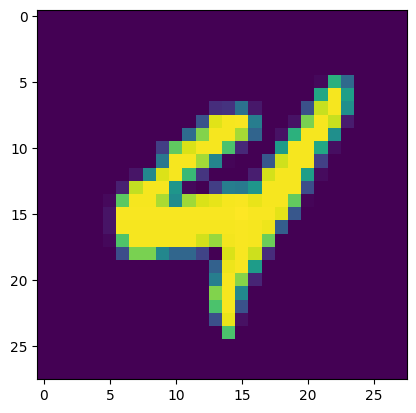

In [51]:
plt.imshow(X[4].view(28,28))
plt.show()

In [52]:
print(torch.argmax(net(X[4].view(-1,28*28))))
print(y[4])

tensor(4)
tensor(4)
